# DISEÑO Y ANÁLISIS DE UN EXPERIMENTO SOBRE EL RENDIMIENTO ACADÉMICO

### I) OBJETIVO:
Evaluar si un nuevo programa de tutoría mejora el rendimiento académico de los estudiantes.

### II) ANTECEDENTES:
Se tienen 2 grupos de estudiantes, uno que recibe el programa de tutoría y otro que no recibe el programa (grupo de control).
- Grupo A (15 estudiantes): Recibe el programa de tutoría.
- Grupo B (15 estudiantes): No recibe el programa (grupo de control).

Los resultados del rendimiento académico se miden mediante un examen estándar, donde las calificaciones oscilan entre 0 y 100 puntos. Los datos obtenidos son los siguientes:

- grupo_a = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]

- grupo_b = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

### III) PLAN:

- Diseño del experimento
- Análisis de datos
- Pruebas de hipótesis
- Conclusiones

---------------------------------

# 1.- Diseño del Experimento
#### ¿Cómo se podría mejorar el diseño del experimento para reducir posibles sesgos?
Puntos a tener en cuenta:

Para reducir posibles sesgos en el experimento, se recomienda:

- 1) Aleatorización: Asignar aleatoriamente los estudiantes a los grupos (A y B) para evitar sesgos de selección y asegurar que características como habilidades previas o motivación se distribuyan equitativamente.
- 2) Enmascaramiento (doble ciego): Idealmente, ni los estudiantes ni los evaluadores deberían saber quién recibe la tutoría (grupo A) y quién no (grupo B), para evitar sesgos de comportamiento o evaluación.
- 3) Control de variables externas: Monitorear factores como asistencia, nivel socioeconómico o horas de estudio, e incluirlos en el análisis si es necesario.

# 2.- Analisis de Datos
### 2.1. Cálculo de Estadísticas Descriptivas
- Calculo de la media y la desviación estándar para ambos grupos.
- Representación gráfica de los datos.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import ttest_ind

In [2]:
grupo_a = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]
grupo_b = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

df = pd.DataFrame({
    'Grupo A': grupo_a,
    'Grupo B': grupo_b
})
df.head()

,Grupo A,Grupo B
0,85,70
1,90,72
2,78,75
3,88,78
4,92,80


In [12]:
print(f'GRUPO A \nPromedio: {df['Grupo A'].mean():.2f} \nDesviación Estandar: {df['Grupo A'].std():.2f}')
print('-'*50)
print(f'GRUPO B \nPromedio: {df['Grupo B'].mean():.2f} \nDesviación Estandar: {df['Grupo B'].std():.2f}')

GRUPO A 
Promedio: 85.87 
Desviación Estandar: 4.02
--------------------------------------------------
GRUPO B 
Promedio: 75.07 
Desviación Estandar: 3.71


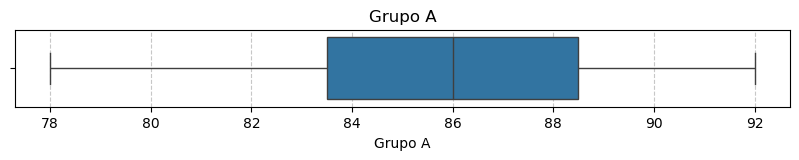

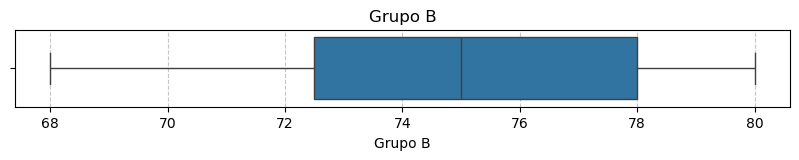

In [4]:
# Revisando atipicos

# Explorando outliers cualitativamente con un grafico

for i in df.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df,x=df[i])
    plt.title(i)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

OBSERVACIONES:
- Ningun estudiante es outlier en su grupo, por lo que son buenos datos para el análisis.

# 3.- Prueba de Hipótesis
### 3.1. Planteamiento de hipótesis nula (H0) y alternativa (H1).
    - H0: No hay diferencia en el rendimiento académico entre los dos grupos. H0 Implica que no hay diferencia de rendimiento (u_a = u_b).
    - H1: El grupo con tutoría tiene un mejor rendimiento académico. H1 Implica que el grupo con preparación si tiene mayor media (u_a > u_b)
### 3.2. Realización de una prueba t para comparar las medias de ambos grupos. Uso de un nivel de significancia (α=0.05).

In [19]:
t_stat, p_value = stats.ttest_ind(grupo_a, grupo_b, alternative='greater')  # Prueba unilateral
print(f'El "t-stat" es: {t_stat:.4f}')
print(f'El "p-value" es: {p_value:.10f}')

El "t-stat" es: 7.6489
El "p-value" es: 0.0000000124


### 3.3. Interpretación del valor-p y decisión si se rechaza o no la hipótesis nula.
    - El t-stat nos indica que hay una gran diferencia (cerca de 8 varianzas) entre ambas medias, lo que implica que es posible que haya una diferencia entre ambos grupos.
    - El p-Value nos indica que podemos rechazar la hipotesis nula, por lo tanto podemos concluir que si hay una mejoría en las notas de los alumnos con un profesor.

# 4. Conclusión
### 4.1. Se calcula un intervalo de confianza del 95% para la diferencia de medias entre los dos grupos.

In [23]:
resultado = ttest_ind(grupo_a, grupo_b, equal_var=False)
ic_sciPy = resultado.confidence_interval(confidence_level=0.95)
print(f"Intervalo de confianza 95%: ({ic_sciPy.low:.4f}, {ic_sciPy.high:.4f})")

Intervalo de confianza 95%: (7.9069, 13.6931)


### 4.2. Interpretación de los resultados.

- El intervalo del 95% nos dice que la diferencia entre las medias de ambos grupos está entre 7.9 y 13.7 con un 95% de probabilidad. Esto reafirma y ademas ayuda a cuantizar que tanto vale la pena contratar un profesor privado.
- Se puede concluir que el programa de tutoría tiene un efecto estadísticamente significativo en el rendimiento académico de los estudiantes.